In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time, warnings, os, re, sys
import datetime as dt
import seaborn as sns

sys.path.append(os.path.abspath(os.path.dirname("../")))
from modules import edaViz
warnings.filterwarnings('ignore')

In [15]:
trainLabels = pd.read_csv('../dataset/origin/train.csv')
testLabels = pd.read_csv('../dataset/origin/test.csv')

In [10]:
trainLabels.to_hdf('../dataset/origin/test.h5','test')
testLabels.to_hdf('../dataset/origin/train.h5','train')

In [ ]:
def printUniqCount(df):
    '''print pandas df.describe() with additional words
    df : pandas dataframe'''
    for col in df.columns:
        print("{} Unique : ".format(i), '\n', df[col].unique(), "\n")
        print("{} Count : ".format(i), '\n', df[col].value_counts(dropna=False), "\n\n")

## 1. Overall

In [2]:
trainLabels.info()
testLabels.info()

trainLabels information :  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null object
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


testLabels information :  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
first_active_month    123622 non-null object
card_id               123623 non-null object
feature_1             123623 non-null int64
feature_2             123623 non-null int64
feature_3             123623 non-null int64
dtypes: int64(3), object(2)
memory usage: 4.7+ MB




In [4]:
trainLabels.describe()
testLabels.describe()

trainLabels Describe :  
            feature_1      feature_2      feature_3         target
count  201917.000000  201917.000000  201917.000000  201917.000000
mean        3.105311       1.745410       0.565569      -0.393636
std         1.186160       0.751362       0.495683       3.850500
min         1.000000       1.000000       0.000000     -33.219281
25%         2.000000       1.000000       0.000000      -0.883110
50%         3.000000       2.000000       1.000000      -0.023437
75%         4.000000       2.000000       1.000000       0.765453
max         5.000000       3.000000       1.000000      17.965068 


testLabels Describe :  
           feature_1      feature_2      feature_3
count  123623.00000  123623.000000  123623.000000
mean        3.10926       1.741796       0.564377
std         1.18911       0.749195       0.495840
min         1.00000       1.000000       0.000000
25%         2.00000       1.000000       0.000000
50%         3.00000       2.000000       1.000000
75

## 2. first active month

- split to year and month

In [34]:
print(trainLabels['first_active_month'].head(10))
print("\n\n",type(trainLabels['first_active_month'][0]))

0    2017-06
1    2017-01
2    2016-08
3    2017-09
4    2017-11
5    2016-09
6    2016-12
7    2017-09
8    2017-08
9    2016-08
Name: first_active_month, dtype: object


 <class 'str'>


In [35]:
trainLabels.rename({'first_active_month': 'first_active'})
testLabels.rename({'first_active_month': 'first_active'})

def preFirstActiveMonth(df):
    year = df['first_active_month'].apply(lambda row : str(row)[:4])
    month = df['first_active_month'].apply(lambda row : str(row)[5:7])
    return year, month

trainLabels['first_active_year'], trainLabels['first_active_month'] = preFirstActiveMonth(trainLabels)
testLabels['first_active_year'], testLabels['first_active_month'] = preFirstActiveMonth(testLabels)

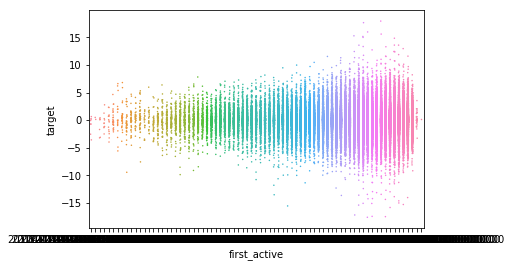

In [84]:
sns.stripplot(trainLabels['first_active'], trainLabels['target'], size=1.5)

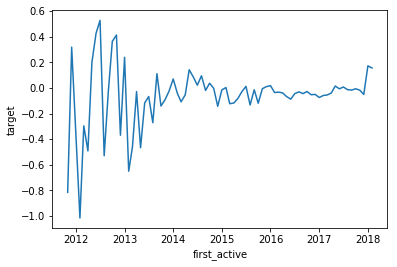

In [79]:
firstActiveGroup = trainLabels[['target', 'first_active']].groupby(['first_active']).aggregate(np.mean)
sns.lineplot(firstActiveGroup.index, firstActiveGroup['target'])

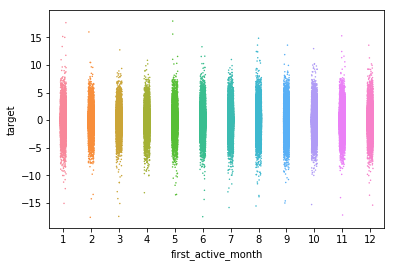

In [83]:
sns.stripplot(trainLabels['first_active_month'], trainLabels['target'], size=1.5)

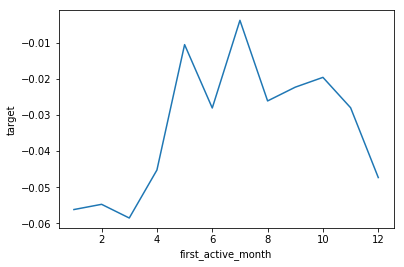

In [78]:
firstActiveMonthTrainGroup=trainLabels[['first_active_month', 'target']].groupby(['first_active_month']).aggregate(np.mean)
sns.lineplot(firstActiveMonthTrainGroup.index, firstActiveMonthTrainGroup['target'])

In [105]:
trainLabels['first_active_month'].value_counts()

12    22495
11    22244
10    21101
8     20353
9     20237
7     18287
6     15378
5     13781
4     12682
1     11834
3     10991
2     10327
Name: first_active_month, dtype: int64

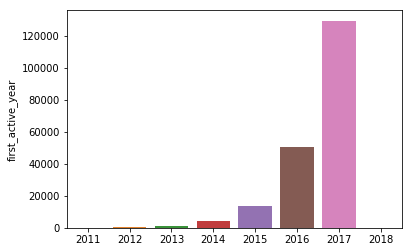

In [54]:
sns.barplot(firstYearTrain.index, firstYearTrain)

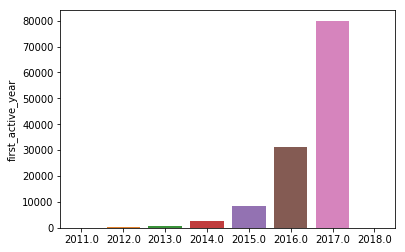

In [60]:
sns.barplot(firstYearTest.index, firstYearTest)

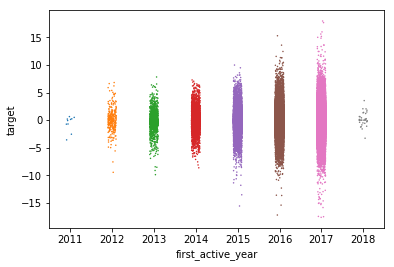

In [82]:
sns.stripplot(trainLabels['first_active_year'], trainLabels['target'], size=1.5)

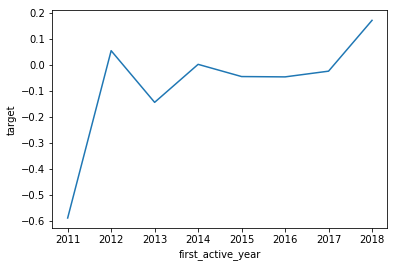

In [80]:
firstActiveYearTrainGroup=trainLabels[['first_active_year', 'target']].groupby(['first_active_year']).aggregate(np.mean)
sns.lineplot(firstActiveYearTrainGroup.index, firstActiveYearTrainGroup['target'])

In [106]:
print(trainLabels['first_active_year'].value_counts())
print(testLabels['first_active_year'].value_counts())

2017    129523
2016     50461
2015     13888
2014      4418
2013      1104
2012       271
2018        35
2011        10
Name: first_active_year, dtype: int64
2017.0    79990
2016.0    31395
2015.0     8605
2014.0     2755
2013.0      691
2012.0      153
2018.0       28
2011.0        5
Name: first_active_year, dtype: int64


In [108]:
def compressYear(df):
    def byRow(row):
        if row == 2018 : return 2017
        if row==2011 or row==2012 or row==2013 : return 2014
        return row
    return df['first_active_year'].apply(lambda row : byRow(row))

trainLabels['first_active_year'] = compressYear(trainLabels)
testLabels['first_active_year'] = compressYear(testLabels)
print(trainLabels['first_active_year'].value_counts())
print(testLabels['first_active_year'].value_counts())

2017    129558
2016     50461
2015     13888
2014      5803
Name: first_active_year, dtype: int64
2017.0    80018
2016.0    31395
2015.0     8605
2014.0     3604
Name: first_active_year, dtype: int64


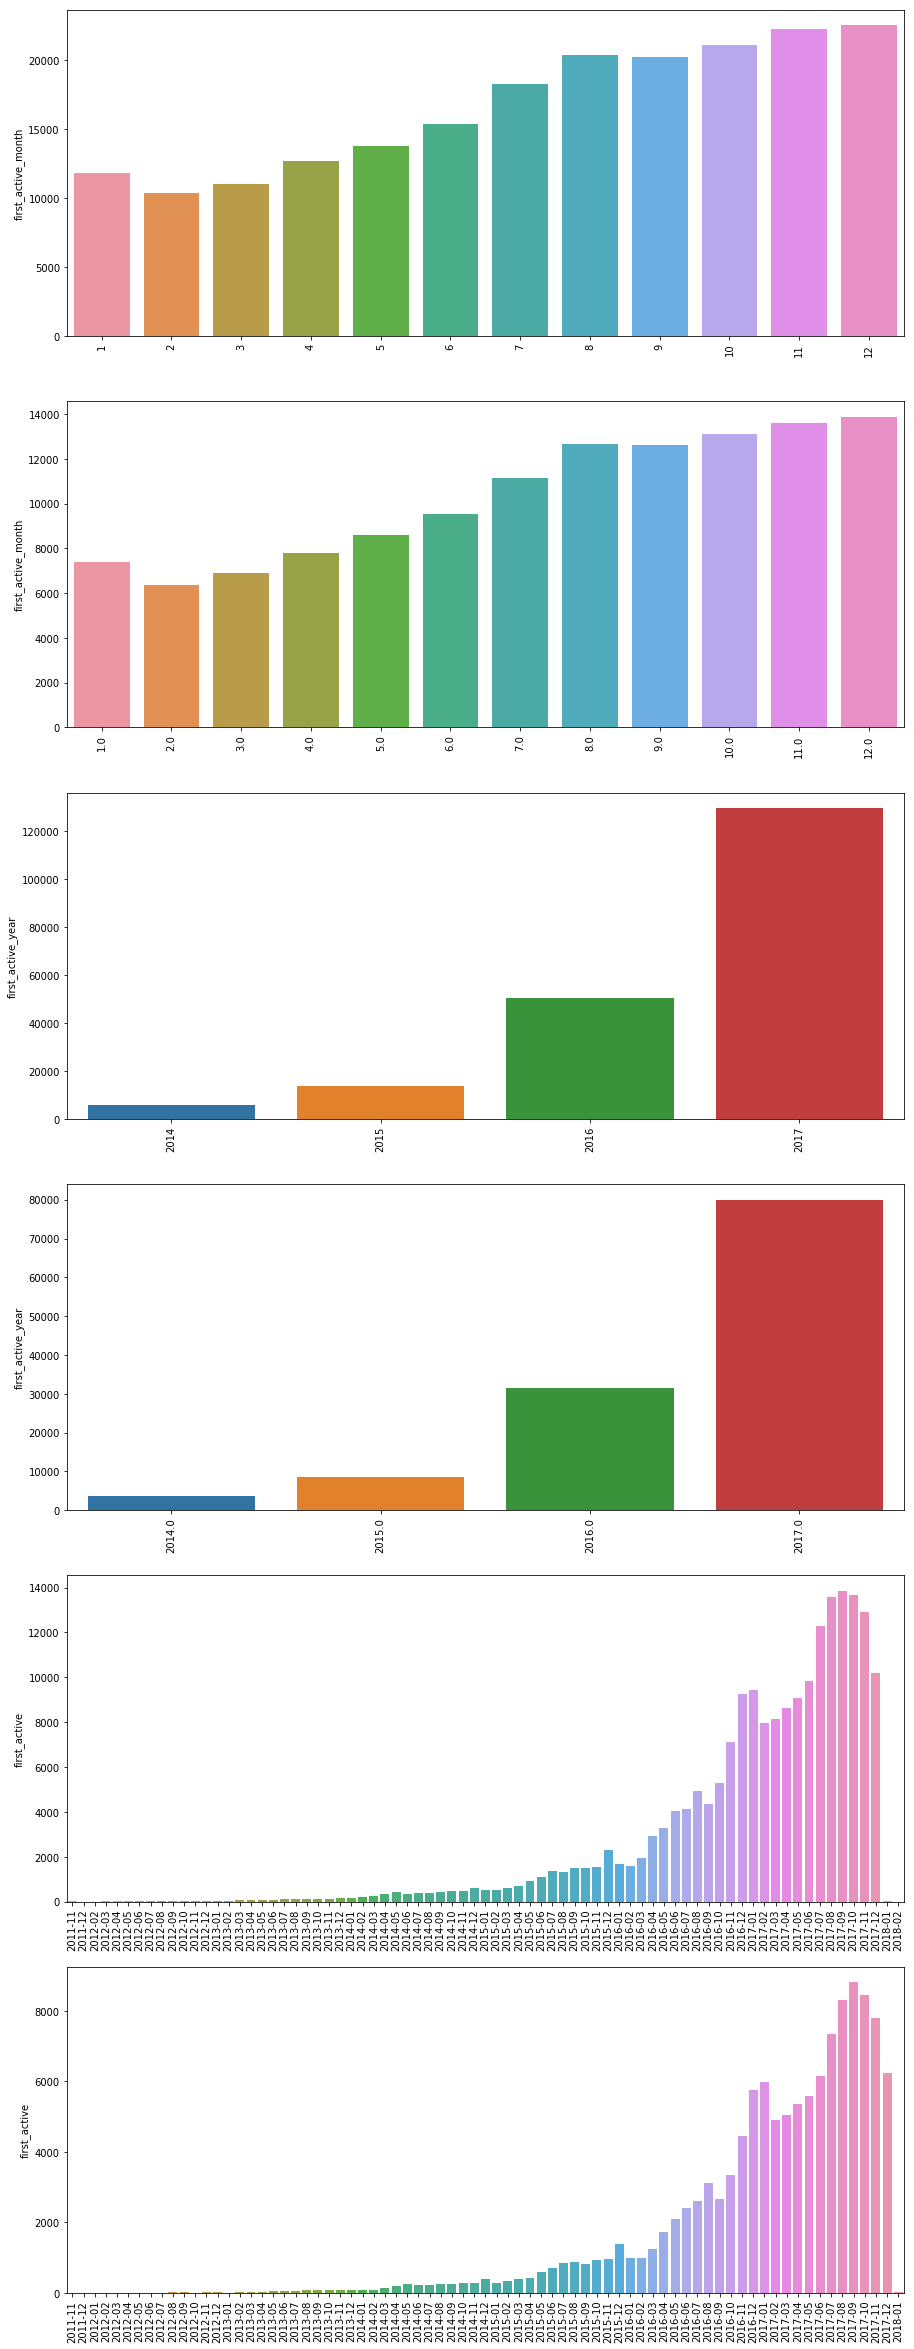

In [17]:
cols = []
for col in trainLabels.columns:
    if col.startswith('first_active'):
        cols.append(trainLabels[col].value_counts().sort_index())
        cols.append(testLabels[col].value_counts().sort_index())

length = len(cols)
fig = plt.figure(figsize=(15, 7*length))
for idx, col in enumerate(cols):
    fig.add_subplot(length, 1, idx+1)
    plt.xticks(rotation='vertical')
    sns.barplot(col.index, col)

In [50]:
firstActiveGroup = trainLabels[['target', 'first_active']].groupby(['first_active']).aggregate(np.mean)
sns.lineplot(firstActiveGroup.index, firstActiveGroup['target'])

AttributeError: module 'seaborn' has no attribute 'lineplot'

## 3. Features

In [9]:
# features
edaViz.printUniqCount(trainLabels[['feature_1','feature_2','feature_3']])
edaViz.printUniqCount(testLabels[['feature_1','feature_2','feature_3']])

feature_1 Unique :  
 [5 4 2 1 3] 

feature_1 Count :  
 3    73573
2    55797
5    40625
4    19885
1    12037
Name: feature_1, dtype: int64 


feature_2 Unique :  
 [2 1 3] 

feature_2 Count :  
 1    89242
2    74839
3    37836
Name: feature_2, dtype: int64 


feature_3 Unique :  
 [1 0] 

feature_3 Count :  
 1    114198
0     87719
Name: feature_3, dtype: int64 


feature_1 Unique :  
 [3 2 5 1 4] 

feature_1 Count :  
 3    44719
2    34115
5    25051
4    12332
1     7406
Name: feature_1, dtype: int64 


feature_2 Unique :  
 [3 1 2] 

feature_2 Count :  
 1    54775
2    45993
3    22855
Name: feature_2, dtype: int64 


feature_3 Unique :  
 [1 0] 

feature_3 Count :  
 1    69770
0    53853
Name: feature_3, dtype: int64 




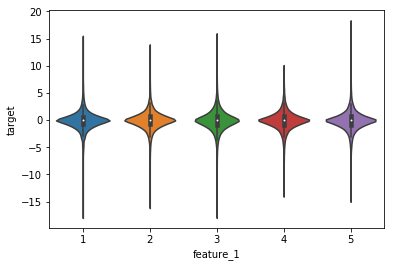

In [114]:
sns.violinplot(x=trainLabels['feature_1'], y=trainLabels['target'])

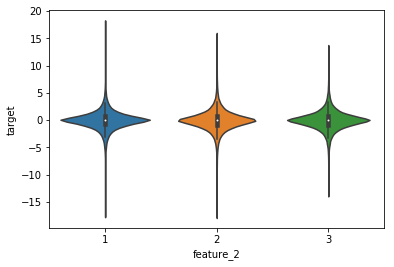

In [113]:
sns.violinplot(x=trainLabels['feature_2'], y=trainLabels['target'])

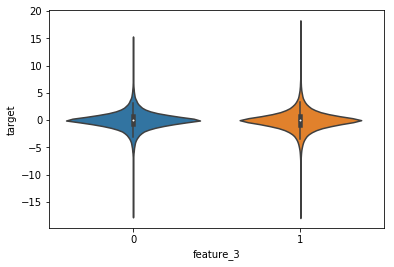

In [112]:
sns.violinplot(x=trainLabels['feature_3'], y=trainLabels['target'])

In [123]:
lgbTrain = lgb.Dataset(trainLabels[['feature_1', 'feature_2', 'feature_3']], label=trainLabels['target'], categorical_feature = ['feature_1', 'feature_2', 'feature_3'])
param = {'metric':'l2_root', 'objective':'regression', 'num_thresds' : 2, 'reg_sqrt':True}
lgb.cv(param, lgbTrain, 10, nfold=5, stratified=False)

{'rmse-mean': [1.718023925609156,
  1.7180205541497482,
  1.7180171426581095,
  1.7180137481756783,
  1.7180103415359362,
  1.7180069303589403,
  1.718003580131263,
  1.7180003408935676,
  1.7179972474525627,
  1.717994320938584],
 'rmse-stdv': [0.010524634879562476,
  0.010524707145322281,
  0.010524665290789801,
  0.010524535195327506,
  0.010524336146109734,
  0.010524154481848754,
  0.010523995401576605,
  0.010523855821682537,
  0.010523733243831573,
  0.01052362540770704]}

## target

In [26]:
targetMin = trainLabels['target'].min()
targetMax = trainLabels['target'].max()
edaViz.printUniqCount(trainLabels[['feature_1','feature_2','feature_3']][trainLabels['target']==targetMin])
edaViz.printUniqCount(trainLabels[['feature_1','feature_2','feature_3']][trainLabels['target']==targetMax])

feature_1 Unique :  
 [3 4 2 5 1] 

feature_1 Count :  
 3    771
2    592
5    534
4    213
1     97
Name: feature_1, dtype: int64 


feature_2 Unique :  
 [1 3 2] 

feature_2 Count :  
 1    1016
2     655
3     536
Name: feature_2, dtype: int64 


feature_3 Unique :  
 [1 0] 

feature_3 Count :  
 1    1305
0     902
Name: feature_3, dtype: int64 


feature_1 Unique :  
 [5] 

feature_1 Count :  
 5    1
Name: feature_1, dtype: int64 


feature_2 Unique :  
 [1] 

feature_2 Count :  
 1    1
Name: feature_2, dtype: int64 


feature_3 Unique :  
 [1] 

feature_3 Count :  
 1    1
Name: feature_3, dtype: int64 




In [29]:
print(trainLabels['target'][trainLabels['target']>targetMin].min())
print(targetMax)

-17.60814651
17.9650684


In [30]:
trainLabels['lowerBound'] = (trainLabels['target']==targetMin)

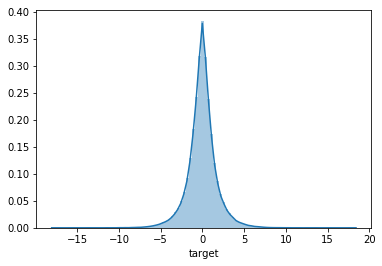

In [98]:
sns.distplot(trainLabels['target'], bins=100, norm_hist=True)